In [1]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# There are three Worksheets, so we can pick which on eto approximate
# There are three Worksheets, so we can pick which on eto approximate
hs = [82, 118, 161]
# Here we load the data
data = pd.read_excel ('/kaggle/input/dataset1/InputData.xlsx', sheet_name='HS='+str(hs[0]))
data.head(4)

,Lp,Hdc [A/m],Vpp [mV]
0,1,-152.4104,2.693146
1,2,-137.9856,2.772855
2,3,-123.4848,2.681504
3,4,-108.4824,2.696149


In [3]:
#see the colums of the dataset
data.columns

Index(['Lp', 'Hdc [A/m]', 'Vpp [mV]'], dtype='object')

In [4]:
#give the inputs
x=data[['Hdc [A/m]']].to_numpy().reshape(-1,1)

In [5]:
#give the outputs
y=data[['Vpp [mV]']].to_numpy().reshape(-1,1)

In [6]:
#convert to 1D arrray
y = np.ravel(y)

In [7]:
#split the data to 90% for trainting and 10% for testing
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state=1, test_size=0.1)

In [8]:
#scalling data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [9]:
y_train_flat = np.ravel(y_train)

In [10]:
mlp_regressor = MLPRegressor(hidden_layer_sizes = (15,) , activation='tanh', random_state=1, learning_rate='adaptive', max_iter=5000).fit(x_train, y_train)

In [11]:
mlp_regressor.fit(x_train_scaled,y_train_flat)

MLPRegressor(activation='tanh', hidden_layer_sizes=(15,),
             learning_rate='adaptive', max_iter=5000, random_state=1)

In [12]:
# Evaluating the model quality
r_s = mlp_regressor.score(x_test_scaled, y_test)
print('score of r square: ', r_s)

score of r square:  0.8908781214581072


In [13]:
# Use the trained model to make predictions on the test data
y_pred = mlp_regressor.predict(x_test_scaled)

In [14]:
# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.2563202520342972


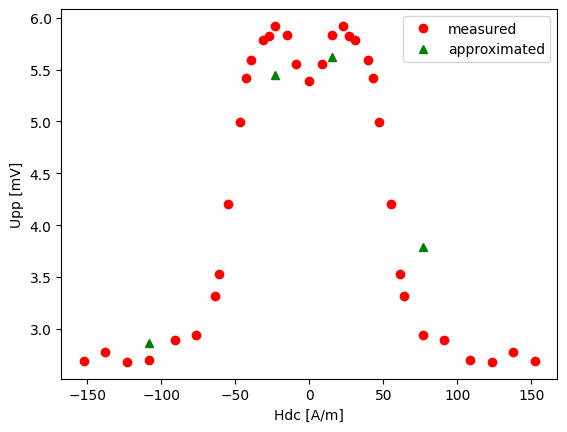

In [15]:
# And plot the results... :)
patterns = plt.plot(data[['Hdc [A/m]']], data['Vpp [mV]'], 'ro', x_test, y_pred, 'g^')    
plt.xlabel('Hdc [A/m]')
plt.ylabel('Upp [mV]')
plt.legend(patterns[:2], ['measured', 'approximated'])
plt.show()

In [16]:
#linear regression 
regressor = LinearRegression()

In [17]:
# Fit the linear regression model to the training data
regressor.fit(x_train_scaled, y_train)

LinearRegression()

In [18]:
# Evaluating the model quality
r_sq = regressor.score(x_test_scaled, y_test)
print('score of r square: ', r_sq)

score of r square:  -0.004601348265174332
